In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
training_set = pd.read_csv(r"C:\Users\jmamt\Downloads\train.csv")
test_set = pd.read_csv(r"C:\Users\jmamt\Downloads\eval.csv")

training_results = training_set.pop("survived")
test_results = test_set.pop("survived")
print(training_set)

        sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  22.0                   1      0   7.2500   Third  unknown   
1    female  38.0                   1      0  71.2833   First        C   
2    female  26.0                   0      0   7.9250   Third  unknown   
3    female  35.0                   1      0  53.1000   First        C   
4      male  28.0                   0      0   8.4583   Third  unknown   
..      ...   ...                 ...    ...      ...     ...      ...   
622    male  28.0                   0      0  10.5000  Second  unknown   
623    male  25.0                   0      0   7.0500   Third  unknown   
624  female  19.0                   0      0  30.0000   First        B   
625  female  28.0                   1      2  23.4500   Third  unknown   
626    male  32.0                   0      0   7.7500   Third  unknown   

     embark_town alone  
0    Southampton     n  
1      Cherbourg     n  
2    Southampton     y  
3    Southa

In [3]:
#Make all the parameters numerical

numerical_columns = ['age', 'fare']
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

trueFeatures = []

for categFeature in categorical_columns:
    uniqueVals = training_set[categFeature].unique()
    trueFeatures.append(tf.feature_column.categorical_column_with_vocabulary_list(categFeature, uniqueVals))
    
for numFeatures in numerical_columns:
    trueFeatures.append(tf.feature_column.numeric_column(numFeatures, dtype=tf.float32))
    
print(trueFeatures)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [4]:
#Create epochs and send in batchs of data to train to

def makeInputFunc(rawData, ylabels, epochs=20, batchSize=50):
    def inputFunc():
        print(rawData)
        data = tf.data.Dataset.from_tensor_slices((dict(rawData), ylabels))
        print(data)
        data.shuffle(800)
        data = data.batch(batchSize).repeat(epochs)
        return data
    return inputFunc

trainingInputFunc = makeInputFunc(training_set, training_results)
testInputFunc = makeInputFunc(test_set, test_results, epochs=1)

In [5]:
#Create Linear Regression Model
linearModel = tf.estimator.LinearClassifier(feature_columns=trueFeatures)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jmamt\\AppData\\Local\\Temp\\tmp14en9ofc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
#Train Linear Regression Model
linearModel.train(trainingInputFunc)
result = linearModel.evaluate(testInputFunc)

print(result['accuracy'])

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
        sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  22.0                   1      0   7.2500   Third  unknown   
1    female  38.0                   1      0  71.2833   First        C   
2    female  26.0                   0      0   7.9250   Third  unknown   
3    female  35.0                   1      0  53.1000   First        C   
4      male  28.0                   0      0   8.4583   Third  unknown   
..      ...   ...                 ...    ...      ...     ...      ...   
622    male  28.0                   0      0  10.5000  Second  unknown   
623    male  25.0                   0      0   7.0500   Third  unknown   
624  female  19.0                   0      0  30.0000   First        B   
625  female  28.0                   1      2  23.4500   Third  unknown   
626    male  32.0                  

C:\Users\jmamt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jmamt\AppData\Local\Temp\tmp14en9ofc\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 303.757
INFO:tensorflow:loss = 0.48845103, step = 100 (0.330 sec)
INFO:tensorflow:global_step/sec: 884.264
INFO:tensorflow:loss = 0.43957475, step = 200 (0.113 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 260...
INFO:tensorflow:Saving checkpoints for 260 into C:\Users\jmamt\AppData\Local\Temp\tmp14en9ofc\model.ckpt.
IN

C:\Users\jmamt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-12T00:03:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jmamt\AppData\Local\Temp\tmp14en9ofc\model.ckpt-260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87607s
INFO:tensorflow:Finished evaluation at 2021-02-12-00:03:49
INFO:tensorflow:Saving dict for global step 260: accuracy = 0.75, accuracy_baseline = 0.625, auc = 0.8344353, auc_precision_recall = 0.78861976, average_loss = 0.47256038, global_step = 260, label/mean = 0.375, loss = 0.47327444, precision = 0.6666667, prediction/mean = 0.3776001, recall = 0.6666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 260: C:\Users\jmamt\AppData\Local\Temp\tmp14en9ofc\model.ckpt-260
0.75


        sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  35.0                   0      0   8.0500   Third  unknown   
1      male  54.0                   0      0  51.8625   First        E   
2    female  58.0                   0      0  26.5500   First        C   
3    female  55.0                   0      0  16.0000  Second  unknown   
4      male  34.0                   0      0  13.0000  Second        D   
..      ...   ...                 ...    ...      ...     ...      ...   
259  female  25.0                   0      1  26.0000  Second  unknown   
260    male  33.0                   0      0   7.8958   Third  unknown   
261  female  39.0                   0      5  29.1250   Third  unknown   
262    male  27.0                   0      0  13.0000  Second  unknown   
263    male  26.0                   0      0  30.0000   First        C   

     embark_town alone  
0    Southampton     y  
1    Southampton     y  
2    Southampton     y  
3    Southa

C:\Users\jmamt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jmamt\AppData\Local\Temp\tmp14en9ofc\model.ckpt-260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


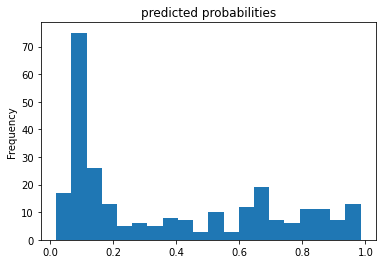

In [7]:
pred_dicts = list(linearModel.predict(testInputFunc))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')